# %load Benson_challenge_solutions.py


# # MTA Data Challenges



NOTES: 
- Unfortunately, I ran out of time and didnt get this as complete as I wanted to
- I used the provided example solutions for #1-3
- I will want to re-implement this in pandas
- "TO DO" indicates items that I need to fix or clean up








In [2]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter




###Challenge 1

In [3]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

In [4]:

with open('data/turnstile_150627.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [5]:

assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [6]:

raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))




In [7]:
# In[7]:

raw_readings.items()[0]


# `raw_readings` is a solution to Challenge 1.



(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [('NR',
   'BMT',
   '06/20/2015',
   '00:00:00',
   'REGULAR',
   '0005938862',
   '0003304207'),
  ('NR',
   'BMT',
   '06/20/2015',
   '04:00:00',
   'REGULAR',
   '0005938915',
   '0003304220'),
  ('NR',
   'BMT',
   '06/20/2015',
   '08:00:00',
   'REGULAR',
   '0005938934',
   '0003304249'),
  ('NR',
   'BMT',
   '06/20/2015',
   '12:00:00',
   'REGULAR',
   '0005939047',
   '0003304407'),
  ('NR',
   'BMT',
   '06/20/2015',
   '16:00:00',
   'REGULAR',
   '0005939329',
   '0003304623'),
  ('NR',
   'BMT',
   '06/20/2015',
   '20:00:00',
   'REGULAR',
   '0005939679',
   '0003304886'),
  ('NR',
   'BMT',
   '06/21/2015',
   '00:00:00',
   'REGULAR',
   '0005939870',
   '0003304930'),
  ('NR',
   'BMT',
   '06/21/2015',
   '04:00:00',
   'REGULAR',
   '0005939929',
   '0003304939'),
  ('NR',
   'BMT',
   '06/21/2015',
   '08:00:00',
   'REGULAR',
   '0005939946',
   '0003304953'),
  ('NR',
   'BMT',
   '06/21/2015',
   '12:00:00',
   

###Challenge 2

In [8]:

datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}




In [9]:

for rows in datetime_cumulative.values():
    assert rows == sorted(rows)




In [10]:

datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}




In [11]:

all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]




[2428, 2443, 2444, 2447, 2448, 2455, 2456, 2459, 2473, 2474, 2487, 2492, 2514, 2521, 2536, 2548, 2552, 2554, 2558, 2567, 2569, 2579, 2602, 2612, 2621, 2622, 2630, 2630, 2644, 2656, 2670, 2671, 2692, 2728, 2731, 2757, 2765, 2804, 2844, 2848, 2920, 2926, 2926, 3488, 87577, 130932, 131711, 131792, 531430, 117440499]


In [12]:

print all_counts[:1200]




[-1208464910, -8664797, -7691983, -1958436, -1283643, -531174, -131370, -131215, -130432, -87562, -73467, -65355, -2545, -1929, -1852, -1782, -1720, -1703, -1687, -1677, -1662, -1659, -1645, -1608, -1572, -1571, -1553, -1543, -1533, -1524, -1492, -1484, -1482, -1455, -1410, -1404, -1403, -1402, -1401, -1397, -1378, -1376, -1362, -1357, -1345, -1339, -1332, -1326, -1323, -1311, -1303, -1302, -1299, -1292, -1290, -1290, -1289, -1268, -1263, -1260, -1257, -1246, -1236, -1233, -1226, -1217, -1205, -1196, -1194, -1184, -1182, -1136, -1133, -1130, -1130, -1126, -1120, -1119, -1116, -1113, -1111, -1105, -1094, -1092, -1089, -1086, -1084, -1079, -1077, -1071, -1065, -1059, -1058, -1044, -1036, -1035, -1028, -1021, -1021, -1012, -1000, -995, -994, -991, -991, -978, -968, -965, -965, -962, -957, -957, -954, -952, -943, -937, -933, -932, -930, -919, -911, -908, -886, -885, -884, -882, -882, -873, -871, -869, -868, -862, -858, -842, -840, -838, -832, -825, -822, -820, -818, -814, -813, -801, -800,

In [13]:

all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)




[(4.0, 172791), (4.2, 10460), (8.0, 189), (4.433333333333334, 161), (0.02222222222222222, 80), (0.02277777777777778, 64), (0.022500000000000003, 55), (0.02777777777777778, 26), (0.03611111111111111, 24), (3.963888888888889, 24)]


In [14]:

datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}


# `datetime_counts` is a solution to Challenge 2.



In [15]:

all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)




0.99415985405


In [16]:

all_good_counts.sort()
print all_good_counts[-5:]




[2848, 2920, 2926, 2926, 3488]


In [17]:
# In[25]:

print all_good_counts[:5]




[0, 0, 0, 0, 0]


# ### Challenge 3

In [18]:

day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())


# `day_counts` is a solution to Challenge 3.

In [19]:
# In[27]:

day_counts

{('A030',
  'R083',
  '01-06-00',
  '23 ST-5 AVE'): [(datetime.date(2015, 6, 20),
   1008), (datetime.date(2015, 6, 21), 767), (datetime.date(2015, 6, 22),
   2438), (datetime.date(2015, 6, 23), 2651), (datetime.date(2015, 6, 24),
   2680), (datetime.date(2015, 6, 25), 2683), (datetime.date(2015, 6, 26),
   1951)],
 ('N134',
  'R385',
  '00-00-00',
  'ROCKAWAY BLVD'): [(datetime.date(2015, 6, 20),
   2), (datetime.date(2015, 6, 21), 3), (datetime.date(2015, 6, 22),
   9), (datetime.date(2015, 6, 23), 5), (datetime.date(2015, 6, 24),
   11), (datetime.date(2015, 6, 25), 9), (datetime.date(2015, 6, 26), 7)],
 ('B014',
  'R148',
  '00-00-01',
  'PARKSIDE AVE'): [(datetime.date(2015, 6, 20),
   1489), (datetime.date(2015, 6, 21), 1356), (datetime.date(2015, 6, 22),
   2073), (datetime.date(2015, 6, 23), 2106), (datetime.date(2015, 6, 24),
   2180), (datetime.date(2015, 6, 25), 2131), (datetime.date(2015, 6, 26),
   2044)],
 ('A013',
  'R081',
  '01-03-00',
  '49 ST-7 AVE'): [(datetime.date

# Challenge 4

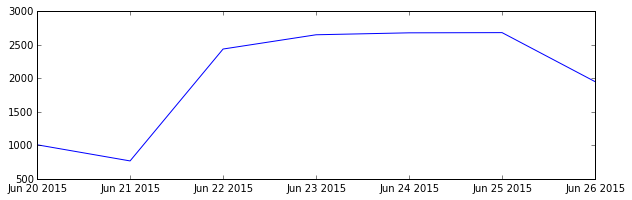

In [20]:

# 
# We will plot the daily time series for a turnstile.
# 
# In ipython notebook, add this to the beginning of your next cell:
# 
# %matplotlib inline
# This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with
# 
# import matplotlib.pyplot as plt
# Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
# 
# plt.figure(figsize=(10,3))
# plt.plot(dates,counts)


get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

dates = []
counts = []
for row in day_counts[('A030',
  'R083',
  '01-06-00',
  '23 ST-5 AVE')] :
    dates.append(row[0])
    counts.append(row[1])

plt.figure(figsize=(10,3)) 
plt.plot(dates,counts)




# Challenge 5

In [21]:

# 
# So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
# We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.
# 

ctrl_unit_day_counts = {}
for turnstyle, row in day_counts.items() :
    #if turnstyle[0] <>'A082':
    #    continue
    key = (turnstyle[0], turnstyle[1], turnstyle[3])
    #print key
    if key in ctrl_unit_day_counts:
        # we previously had a row with this key; add to the totals per day
        #print "PREV", ctrl_unit_day_counts[key]
        #print "ROW", row
        for tup in row:
            row_dict = ctrl_unit_day_counts[key] 
            #row_dict[tup[0]] += tup[1]
            row_dict [tup[0]] = row_dict.setdefault(tup[0], 0) + tup[1]
        ctrl_unit_day_counts[key] = row_dict
        #print "NEXT", ctrl_unit_day_counts[key]
    else:
        # its the first row with this key; create a dict
        row_dict = {}
        for tup in row:
            row_dict[tup[0]] = tup[1]
        ctrl_unit_day_counts[key] = row_dict
        #print 'row_dict',row_dict
    #print 'LOOP',row ###ctrl_unit_day_counts[key]
    




In [22]:
#Day counts for an example control unit:  ctrl_unit_day_counts[('A082', 'R028', 'FULTON ST')]
print ctrl_unit_day_counts[('A082', 'R028', 'FULTON ST')]




{datetime.date(2015, 6, 22): 1568, datetime.date(2015, 6, 25): 1692, datetime.date(2015, 6, 23): 1652, datetime.date(2015, 6, 26): 1436, datetime.date(2015, 6, 20): 463, datetime.date(2015, 6, 21): 241, datetime.date(2015, 6, 24): 1567}


#%%Challenge 6
'''


Similarly, combine everything in each station, and come up with a time series 
of [(date1, count1),(date2,count2),...] type of time series for each STATION, 
    by adding up all the turnstiles in a station.
'''

In [23]:
###    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

station_day_counts = {}
for ckey, row in ctrl_unit_day_counts.items():
    station = ckey[2]
    #print 'station',station
    if station == 'CROWN HTS-UTICA' :
        # TO DO: there is some problem with data for CROWN HGTS
        # just skip it for now
        continue
    assert type(station) == str
    if station in station_day_counts:
        # we previously had a row with this key; add to the totals per day
        #print "PREV", station_day_counts[station]
        #print "ROW", row
        for dtime, val in row.items():
            if dtime.toordinal() <=0 :
                print 'bad datetime; ignore it; station=', station
                continue
            row_dict = station_day_counts[station] 
            row_dict[dtime] = row_dict.setdefault(dtime, 0) +val
        station_day_counts[key] = row_dict
        #print "NEXT", station_day_counts[station]
    else:
        # its the first row with this key; create a dict
        row_dict = {}
        for dtime, val in row.items():
            row_dict[dtime] = val
        station_day_counts[station] = row_dict
        #print 'row_dict',row_dict


In [24]:
#Day counts for an example station  station_day_counts[FULTON ST']
print station_day_counts['FULTON ST']



{datetime.date(2015, 6, 22): 82078, datetime.date(2015, 6, 25): 85230, datetime.date(2015, 6, 23): 82929, datetime.date(2015, 6, 26): 76355, datetime.date(2015, 6, 20): 33282, datetime.date(2015, 6, 21): 24622, datetime.date(2015, 6, 24): 85159}


#Challenge 7
'''


Plot the time series for a station.
'''

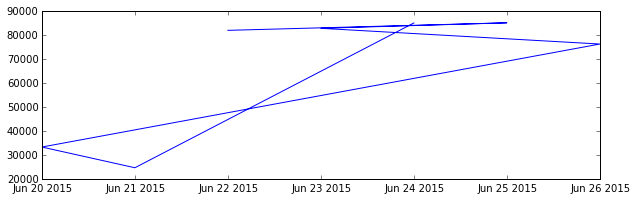

In [25]:
# TO DO: need to sort by date so plot line doesnt ziz-zag

dates = []
counts = []
fs_day_counts = station_day_counts['FULTON ST']
for date,val in fs_day_counts.items() :
    dates.append(date)
    counts.append(val)

plt.figure(figsize=(10,3)) 
plt.plot(dates,counts)

#%%


#Challenge 8

Make one list of counts for one week for one station. Monday's count, 
Tuesday's count, etc. so it's a list of 7 counts. Make the same list for 
another week, and another week, and another week. plt.plot(week_count_list) 
for every week_count_list you created this way. You should get a rainbow plot 
of weekly commute numbers on top of each other.

FULTON ST: plot by day of week


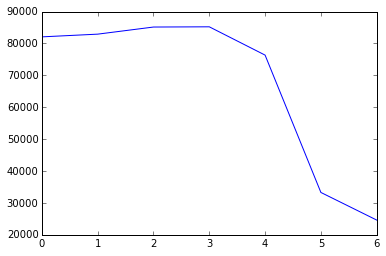

In [26]:

fs_day_counts = station_day_counts['FULTON ST']
#num2day = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3,
#           'Friday':4, 'Saturday':5, 'Sunday':6}

# TO DO: change to list of lists to get rainbow plot

week_count_list = 7* [0]
for date,val in fs_day_counts.items() :
    day = date.weekday()
    #week_count_list[day] = week_count_list.setdefault(day, 0) + val
    week_count_list[day] += val

print 'FULTON ST: plot by day of week'
plt.plot(week_count_list) 

#Challenge 9
'''

Over multiple weeks, sum total ridership for each station and sort them, so 
you can find out the stations with the highest traffic during the time you 
investigate
'''

In [27]:
print 'tabulate station totals'

station_totals = {}
for station, row in station_day_counts.items() :
    #  TO DO : what is problem with data for CROWN HTS-UTICA?
    if type(station) <> str : continue
    for date,val in row.items() :
        if date.toordinal() <=0 :
                print 'bad datetime; ignore it; station=', station
                continue
        station_totals[station] = station_totals.setdefault(station,0) + val
sorted_station_keys_by_total = sorted(station_totals, key=station_totals.__getitem__,
                               reverse=True)
sorted_station_totals = sorted(station_totals.values(), reverse=True)   

tabulate station totals


#%%Challenge 10
'''

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different 
stations.

This should show you that most stations have a small traffic, and the 
histogram bins for large traffic volumes have small bars.
'''

plot histogram on station totals


(array([ 298.,   50.,   17.,    7.,    5.,    1.,    3.,    0.,    1.,    1.]),
 array([  2.00000000e+00,   1.09733500e+05,   2.19465000e+05,
          3.29196500e+05,   4.38928000e+05,   5.48659500e+05,
          6.58391000e+05,   7.68122500e+05,   8.77854000e+05,
          9.87585500e+05,   1.09731700e+06]),
 <a list of 10 Patch objects>)

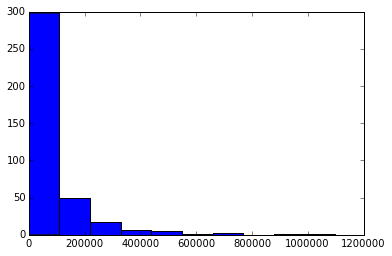

In [28]:
print 'plot histogram on station totals'
#total_ridership_counts = zip(sorted_station_keys_by_total, sorted_station_totals )
total_ridership_counts = sorted_station_totals
plt.hist(total_ridership_counts)

#%%
'''Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort 
the total ridership counts and make a plt.bar graph. For this, you want to 
have two lists: the indices of each bar, and the values. The indices can 
just be 0,1,2,3,..., so you can do

indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)
'''